<a href="https://colab.research.google.com/github/ricardodhuelsmann/data_science_portfolio/blob/main/detec%C3%A7%C3%A3o_fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução

##Sobre o projeto de detecção de notícias falsas com Python

Original = https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/

Este projeto visa desenvolver modelo preditivo de detecção de notícias, entre verdadeira ou falsa. Faz-se uso da biblioteca *sklearn*, mais especificamente o *TfidfVectorizer*. Em seguida é utilizado *PassiveAggressive Classifier* e ajustamos o modelo. Ao final, a pontuação com base em valores de teste é apresentada, indicando a qualidade do modelo.

Info = TF-IDF é *term frequency–inverse document frequency*, que significa frequência do termo–inverso da frequência nos documentos


O conjunto de dados de notícias falsas usado, consiste em um arquivo *.csv*, na forma de 7796×4. A primeira coluna é a notícia, a segunda e a terceira são o título e o texto, e a última coluna é o rótulo (REAL ou FAKE).


Inicialmente, importa-se as bibliotecas e módulos necessários



In [69]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

Em seguida, faz-se upload dos dados a partir de arquivo externo, para um *DataFrame* do *pandas*

In [57]:
dados_base = pd.read_csv('news.csv')

In [58]:
#obter a forma do dataframe
dados_base.shape

(6335, 4)

In [59]:
#Visualizar os primeiros dados do conjunto
dados_base.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


Obter as labels do DataFrame

In [60]:
labels=dados_base.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

A partir do conjunto de dados já discutido, faz-se a divisão dos dados em conjuntos de treinamento e conjunto de testes. Para isso, usa-se a função *train_test_split*, do *sklearn*. Os valores de x são a coluna do texto do DataFrame (dados_base['text']), e y são as *labels*.

Neste caso, usa-se 30% dos dados para teste (test_size=0.3), e para facilitar comparações futuras define-se uma semente (random_state=1).

In [61]:
x_treino, x_teste, y_treino, y_teste = train_test_split(dados_base['text'], labels, test_size=0.3, random_state=1)

Como o conjunto de dados é na língua inglesa, a inicialização do TfidfVectorizer já define essa condição. Faz-se também a exclusão dos 30% de palavras mais frequentes, definindo o '*max_df*' para 0.7.

Palavras de parada são as palavras mais comuns em um idioma que devem ser filtradas antes de processar os dados do idioma natural. E um TfidfVectorizer transforma uma coleção de documentos brutos em uma matriz de recursos TF-IDF.

Por fim, ajusta-se e transforma o vetorizador no conjunto de treino e transforme o vetorizador no conjunto de teste.

In [62]:
#Define o vetorizador
tfidf_vetorizador=TfidfVectorizer(stop_words='english', max_df=0.7)

#Treinamento
tfidf_treino=tfidf_vetorizador.fit_transform(x_treino)

#Teste
tfidf_teste=tfidf_vetorizador.transform(x_teste)

Após isso, inicializa-se o PassiveAggressiveClassifier.

A seguir, usar o conjunto de testes e calcular a precisão do treino. Para isso, usar o *precision_score()* de *sklearn.metrics*.

In [63]:
modelo = PassiveAggressiveClassifier(max_iter=100)
modelo.fit(tfidf_treino,y_treino)


y_previsao=modelo.predict(tfidf_teste)
escore=accuracy_score(y_teste,y_previsao)
print(f'Accuracy: {round(escore*100,2)}%')

Accuracy: 93.63%


Obtivemos uma precisão de 93.63% com este modelo. 

Para finalizar, visualizamos a matriz de confusão para obter informações sobre os falsos positivos e negativos (assim como os verdadeiros positivos e negativos)

In [64]:
#Construir a matriz de confusão
matriz_respsota = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(matriz_respsota)

[[920  67]
 [ 51 863]]


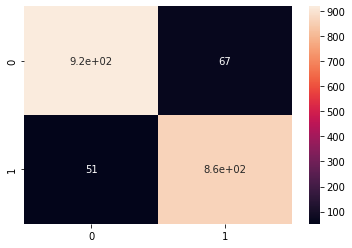

In [65]:
#Verificar graficamente os resultados
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

Resumindo: a partir de um conjunto de dados políticos, foi implementado um *TfidfVectorizer* com *PassiveAggressiveClassifier* e ajustou-se o modelo. Por fim, obteve-se uma boa exatidão, com mais de 93% de acertos.
